In [1]:
import geopandas as gpd
import osmnx as ox
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import aup
%matplotlib inline

In [2]:
city = 'Guadalajara'

In [3]:
gdf_pop = gpd.read_file('../data/raw/AGEB_urb_2010_SCINCE.geojson')

gdf_area = aup.load_polygon(city)
gdf_pop_area = gpd.clip(gdf_pop,gdf_area)

G = aup.download_graph(gdf_area,city,network_type='all_private',save=False)
nodes = ox.graph_to_gdfs(G, edges=False)
gdf_pop_area = ox.utils_geo.projection.project_gdf(gdf_pop_area,to_crs=nodes.crs)

Guadalajara retrived graph


In [136]:
totales = gpd.sjoin(nodes,gdf_pop_area).groupby('CVEGEO').count().rename(columns={'x':'nodes_in'})[['nodes_in']].reset_index() #caluculate the totals
temp = pd.merge(gdf_pop_area,totales,left_on='CVEGEO',right_on='CVEGEO') #get a temporal dataframe with the totals and columns
for col in temp.columns.tolist()[3:-2]: #get the average for the values
    temp[col] = temp[col]/temp['nodes_in']
temp.drop(['nodes_in'],axis=1,inplace=True) #drop the nodes_in column
nodes = gpd.sjoin(nodes,temp) #spatial join the nodes with the values

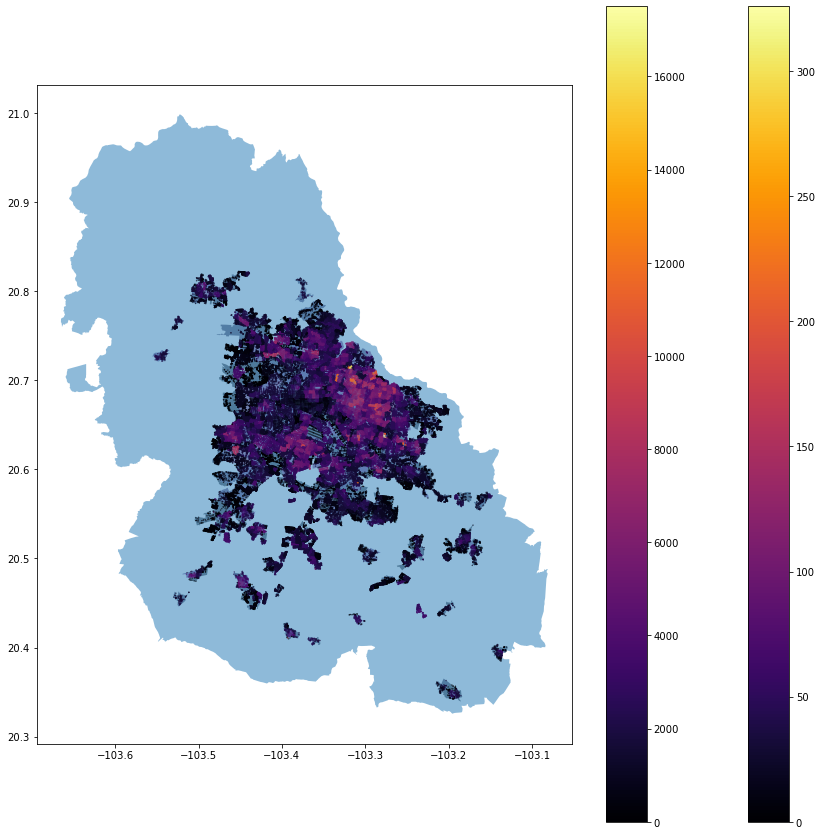

In [143]:
ax = nodes.plot(column='pobtot',markersize=0.1,figsize=(15,15),legend=True,cmap='inferno',zorder=3)
gdf_pop_area.plot(column='pobtot',markersize=0.1,figsize=(15,15),legend=True,cmap='inferno',zorder=-1,alpha=0.5,ax=ax)
gdf_area.plot(markersize=0.1,figsize=(15,15),legend=False,zorder=-1,alpha=0.5,ax=ax)

In [ ]:
gdf_pop_area